#### **@Author : Rupesh Kumar**

#### **Date : 12/01/2023**

[![image](https://www.linkpicture.com/q/BMW-1.jpg)](https://www.linkpicture.com/view.php?img=LPic63bf680209b2c372151899)

<a id="1"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 1. BUSINESS UNDERSTANDING</p>

##### *Duoro Hawk is a company that is pioneering the world's first large fleet of fully electric, self-piloting autonomous flying taxis. The company wants to deploy the first network of autonomous air taxis in the coming year. As part of the elite skyride DS ad-hock data science and engineering team, I will be piloting your flying to conduct a predictive study, by understanding the patterns from our previously conducted test simulation flights to predict the next destination. Leading to seamless end-to-end connectivity, so lets flytogether and begin our journey*

[![image](https://www.linkpicture.com/q/Duoro_Hawk_Flying.jpg)](https://www.linkpicture.com/view.php?img=LPic63bf6856c4d8b306146506)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
**BUSINESS UNDERSTANDING**
    
**2. DATA UNDERSTANDING**
    
**3. DATA PREPARATION**
    
**4. MODELING**
    
**5. CONCLUSION**
    
**6. THANK YOU 😊**

<a id="2"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 2. DATA UNDERSTANDING</p>

**We have a comprehensive dataset representing the paths of all 442 taxis operating in the Portuguese city of Porto for a whole year (from 01/07/2013 to 30/06/2014). (i.e. one CSV file named "train.csv"). Each data sample represents a finished journey. Each data sample corresponds to one completed trip. It contains a total of 10 distinct features which are as follows:**

##### 1.) TRIP_ID: (String) It contains an unique identifier for each trip.
##### 2.) CALL_TYPE: (char) It identifies the way used to demand this service. It may contain one of three possible values:
- **‘A’ if this trip was dispatched from the central.**
- **‘B’ if this trip was demanded directly to a taxi driver on a specific stand.**
- **‘C’ otherwise (i.e. a trip demanded on a random street).**

##### 3.) ORIGINCALL: (integer) It contains an unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALLTYPE=’A’. Otherwise, it assumes a NULL value.

#### 4.) ORIGINSTAND: (integer): It contains an unique identifier for the taxi stand. It identifies the starting point of the trip if CALLTYPE=’B’ Otherwise, it assumes a NULL value.

#### 5.) WEATHER: (String): Information on the weather that day, unique values include: Sunny, Rainy, Cloudy, Windy, and Foggy
#### 6.) TAXI_ID: (integer): It contains an unique identifier for the flying taxi that performed each trip.
#### 7.) TIMESTAMP: (integer) Unix Timestamp (in seconds). It identifies the trip’s start.
#### 8.) MISSING_DATA: (Boolean) It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing.
#### 9.) POLYLINE: (String): It contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of trip. The last list item corresponds to the trip’s destination while the first one represents its start.


##### **WE WILL BE DOING THE FOLLOWING STEPS TO FURTHER UNDERSTAND THE DATA:**
- Importing packages
- Loading data
- Get information on the data
- Conducting summary statistics
- Taking care of Null values
- Insights into datatypes

In [54]:
# IMPORTING PACKAGES
import pandas as pd
import datetime 
import numpy as np
import re

# Visualization
from matplotlib import pyplot as plt
import folium
# import folium
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# from colorama import Fore

In [2]:
# LOADING DATA
train = pd.read_csv('/Users/rupesh/Desktop/COD/Duoro_Hawk_EDA/data/train_df.csv')
test = pd.read_csv('/Users/rupesh/Desktop/COD/Duoro_Hawk_EDA/data/test_df.csv')

In [3]:
train.shape 

(1710670, 11)

In [4]:
test.shape 

(320, 10)

In [5]:
train.head()

Unnamed: 0              TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND  \
0           0  1372636858620000589         C          NaN           NaN   
1           1  1372637303620000596         B          NaN           7.0   
2           2  1372636951620000320         C          NaN           NaN   
3           3  1372636854620000520         C          NaN           NaN   
4           4  1372637091620000337         C          NaN           NaN   

    TAXI_ID   TIMESTAMP DAY_TYPE  MISSING_DATA  \
0  20000589  1372636858        A         False   
1  20000596  1372637303        A         False   
2  20000320  1372636951        A         False   
3  20000520  1372636854        A         False   
4  20000337  1372637091        A         False   

                                            POLYLINE WEATHER  
0  [[-8.618643,41.141412],[-8.618499,41.141376],[...   Rainy  
1  [[-8.639847,41.159826],[-8.640351,41.159871],[...   Foggy  
2  [[-8.612964,41.140359],[-8.613378,41.14035],[-...   Rainy  
3  [[-8.574678,41.151951],[-8.574705,41.151942],[...  Cloudy  
4  [[-8.645994,41.18049],[-8.645949,41.180517],[-...   Windy

In [6]:
test.head()

TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID   TIMESTAMP DAY_TYPE  \
0      T1         B          NaN          15.0  20000542  1408039037        A   
1      T2         B          NaN          57.0  20000108  1408038611        A   
2      T3         B          NaN          15.0  20000370  1408038568        A   
3      T4         B          NaN          53.0  20000492  1408039090        A   
4      T5         B          NaN          18.0  20000621  1408039177        A   

   MISSING_DATA                                           POLYLINE WEATHER  
0         False  [[-8.585676,41.148522],[-8.585712,41.148639],[...   Foggy  
1         False  [[-8.610876,41.14557],[-8.610858,41.145579],[-...  Cloudy  
2         False  [[-8.585739,41.148558],[-8.58573,41.148828],[-...   Foggy  
3         False  [[-8.613963,41.141169],[-8.614125,41.141124],[...   Foggy  
4         False      [[-8.619903,41.148036],[-8.619894,41.148036]]   Rainy

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   TRIP_ID       int64  
 2   CALL_TYPE     object 
 3   ORIGIN_CALL   float64
 4   ORIGIN_STAND  float64
 5   TAXI_ID       int64  
 6   TIMESTAMP     int64  
 7   DAY_TYPE      object 
 8   MISSING_DATA  bool   
 9   POLYLINE      object 
 10  WEATHER       object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 132.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       320 non-null    object 
 1   CALL_TYPE     320 non-null    object 
 2   ORIGIN_CALL   72 non-null     float64
 3   ORIGIN_STAND  123 non-null    float64
 4   TAXI_ID       320 non-null    int64  
 5   TIMESTAMP     320 non-null    int64  
 6   DAY_TYPE      320 non-null    object 
 7   MISSING_DATA  320 non-null    bool   
 8   POLYLINE      320 non-null    object 
 9   WEATHER       320 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 22.9+ KB


In [9]:
Pcent_missing_train = train.isnull().sum() * 100 / len(train)
Pcent_missing_train

Unnamed: 0       0.000000
TRIP_ID          0.000000
CALL_TYPE        0.000000
ORIGIN_CALL     78.676776
ORIGIN_STAND    52.850111
TAXI_ID          0.000000
TIMESTAMP        0.000000
DAY_TYPE         0.000000
MISSING_DATA     0.000000
POLYLINE         0.000000
WEATHER          0.000000
dtype: float64

In [10]:
Pcent_missing_test = test.isnull().sum() * 100 / len(train)
Pcent_missing_test

TRIP_ID         0.000000
CALL_TYPE       0.000000
ORIGIN_CALL     0.014497
ORIGIN_STAND    0.011516
TAXI_ID         0.000000
TIMESTAMP       0.000000
DAY_TYPE        0.000000
MISSING_DATA    0.000000
POLYLINE        0.000000
WEATHER         0.000000
dtype: float64

### Note:
- **There is a strange colun in the train data "Unnamed: 0. We will investigate to see if they make sense else we drop it**
- **We can also notice another colum "DAY_TYPE" We will investigate to see if they make sense else we drop it**

In [11]:
train["Unnamed: 0"].unique() # Seems to be a duplicate of index index values

array([      0,       1,       2, ..., 1710667, 1710668, 1710669])

In [12]:
# DROPPING "Unnamed: 0" COLUMN
train = train.drop("Unnamed: 0", axis=1)

In [13]:
train["DAY_TYPE"].unique() # Seems to be just 1 value A as does not add value to the study, we proceed to drop it as well.

array(['A'], dtype=object)

In [14]:
# DROPPING "DAY_TYPE" COLUMN
train = train.drop("DAY_TYPE", axis=1)

In [15]:
train

TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0        1372636858620000589         C          NaN           NaN  20000589   
1        1372637303620000596         B          NaN           7.0  20000596   
2        1372636951620000320         C          NaN           NaN  20000320   
3        1372636854620000520         C          NaN           NaN  20000520   
4        1372637091620000337         C          NaN           NaN  20000337   
...                      ...       ...          ...           ...       ...   
1710665  1404171463620000698         C          NaN           NaN  20000698   
1710666  1404171367620000670         C          NaN           NaN  20000670   
1710667  1388745716620000264         C          NaN           NaN  20000264   
1710668  1404141826620000248         B          NaN          12.0  20000248   
1710669  1404157147620000079         B          NaN          34.0  20000079   

          TIMESTAMP  MISSING_DATA  \
0        1372636858         False   
1        1372637303         False   
2        1372636951         False   
3        1372636854         False   
4        1372637091         False   
...             ...           ...   
1710665  1404171463         False   
1710666  1404171367         False   
1710667  1388745716         False   
1710668  1404141826         False   
1710669  1404157147         False   

                                                  POLYLINE WEATHER  
0        [[-8.618643,41.141412],[-8.618499,41.141376],[...   Rainy  
1        [[-8.639847,41.159826],[-8.640351,41.159871],[...   Foggy  
2        [[-8.612964,41.140359],[-8.613378,41.14035],[-...   Rainy  
3        [[-8.574678,41.151951],[-8.574705,41.151942],[...  Cloudy  
4        [[-8.645994,41.18049],[-8.645949,41.180517],[-...   Windy  
...                                                    ...     ...  
1710665  [[-8.612469,41.14602],[-8.612487,41.145993],[-...  Cloudy  
1710666  [[-8.610138,41.140845],[-8.610174,41.140935],[...   Windy  
1710667                                                 []   Windy  
1710668  [[-8.630712,41.154885],[-8.63073,41.154813],[-...   Sunny  
1710669  [[-8.615538,41.140629],[-8.615421,41.140746],[...   Sunny  

[1710670 rows x 9 columns]

In [16]:
# CONDUCTING SUMMARY STATISTICS 
train.describe()

TRIP_ID    ORIGIN_CALL   ORIGIN_STAND       TAXI_ID     TIMESTAMP
count  1.710670e+06  364770.000000  806579.000000  1.710670e+06  1.710670e+06
mean   1.388622e+18   24490.363018      30.272381  2.000035e+07  1.388622e+09
std    9.180944e+15   19624.290043      17.747840  2.112405e+02  9.180944e+06
min    1.372637e+18    2001.000000       1.000000  2.000000e+07  1.372637e+09
25%    1.380731e+18    6593.000000      15.000000  2.000017e+07  1.380731e+09
50%    1.388493e+18   18755.000000      27.000000  2.000034e+07  1.388493e+09
75%    1.396750e+18   40808.000000      49.000000  2.000052e+07  1.396750e+09
max    1.404173e+18   63884.000000      63.000000  2.000098e+07  1.404173e+09

In [17]:
test.describe()

ORIGIN_CALL  ORIGIN_STAND       TAXI_ID     TIMESTAMP
count     72.000000    123.000000  3.200000e+02  3.200000e+02
mean   38074.083333     29.991870  2.000035e+07  1.412465e+09
std    28528.026167     18.444198  2.065355e+02  3.144882e+06
min     2002.000000      1.000000  2.000000e+07  1.408032e+09
25%     9159.500000     15.000000  2.000018e+07  1.412064e+09
50%    36879.500000     23.000000  2.000035e+07  1.412616e+09
75%    65548.250000     49.000000  2.000052e+07  1.414814e+09
max    86436.000000     63.000000  2.000090e+07  1.419172e+09

In [18]:
# INSIGHTS INTO TRAIN DATATYPES
train.dtypes

TRIP_ID           int64
CALL_TYPE        object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID           int64
TIMESTAMP         int64
MISSING_DATA       bool
POLYLINE         object
WEATHER          object
dtype: object

In [19]:
# INSIGHTS INTO TEST DATATYPES
test.dtypes

TRIP_ID          object
CALL_TYPE        object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID           int64
TIMESTAMP         int64
DAY_TYPE         object
MISSING_DATA       bool
POLYLINE         object
WEATHER          object
dtype: object

**Below code proves that all the taxi ids in test set are also present in training set. We don't have any new taxi id in test data. But there are 20 origin calls that are not in training data but are in test data.**

<a id="3"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 3. DATA PREPARATION</p>

#### **In this section we will be doing the following steps:**

- Investigating all elements within each feature
- Time data preprocessing
- Lat & Long data processing
- Time series multiple visualization
- Correlation Studies
- Map route visualization
- Customer call type study

In [20]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE IN TRAINING DATA
for colum in train:
    unique_values = np.unique(train[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features TRIP_ID : 1710589
The number of unique values for features CALL_TYPE : 3 --- ['A' 'B' 'C']
The number of unique values for features ORIGIN_CALL : 57106
The number of unique values for features ORIGIN_STAND : 64
The number of unique values for features TAXI_ID : 448
The number of unique values for features TIMESTAMP : 1655366
The number of unique values for features MISSING_DATA : 2 --- [False  True]
The number of unique values for features POLYLINE : 1703650
The number of unique values for features WEATHER : 5 --- ['Cloudy' 'Foggy' 'Rainy' 'Sunny' 'Windy']


In [21]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE IN TESTING DATA
for colum in test:
    unique_values = np.unique(test[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features TRIP_ID : 320
The number of unique values for features CALL_TYPE : 3 --- ['A' 'B' 'C']
The number of unique values for features ORIGIN_CALL : 61
The number of unique values for features ORIGIN_STAND : 40
The number of unique values for features TAXI_ID : 244
The number of unique values for features TIMESTAMP : 315
The number of unique values for features DAY_TYPE : 1 --- ['A']
The number of unique values for features MISSING_DATA : 1 --- [False]
The number of unique values for features POLYLINE : 320
The number of unique values for features WEATHER : 5 --- ['Cloudy' 'Foggy' 'Rainy' 'Sunny' 'Windy']


In [22]:
# DECODING TIME SIGNATURE
train["TIMESTAMP"] = [float(time) for time in train["TIMESTAMP"]]
train["data_time"] = [datetime.datetime.fromtimestamp(time, datetime.timezone.utc) for time in train["TIMESTAMP"]]

In [23]:
train["data_time"].value_counts()

2014-04-10 12:57:28+00:00    5
2014-03-27 19:31:22+00:00    5
2014-03-27 18:49:12+00:00    5
2014-06-24 04:58:36+00:00    4
2013-11-17 03:11:21+00:00    4
                            ..
2013-11-02 01:31:09+00:00    1
2013-11-02 01:45:08+00:00    1
2013-11-02 02:00:15+00:00    1
2013-11-02 02:08:21+00:00    1
2014-06-30 19:39:07+00:00    1
Name: data_time, Length: 1655366, dtype: int64

In [24]:
# CREATING TIME BASED FEATURES
train["year"] = train["data_time"].dt.year
train["month"] = train["data_time"].dt.month
train["day"] = train["data_time"].dt.day
train["hour"] = train["data_time"].dt.hour
train["min"] = train["data_time"].dt.minute
train["weekday"] = train["data_time"].dt.weekday

In [25]:
train.head()

TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0  1372636858620000589         C          NaN           NaN  20000589   
1  1372637303620000596         B          NaN           7.0  20000596   
2  1372636951620000320         C          NaN           NaN  20000320   
3  1372636854620000520         C          NaN           NaN  20000520   
4  1372637091620000337         C          NaN           NaN  20000337   

      TIMESTAMP  MISSING_DATA  \
0  1.372637e+09         False   
1  1.372637e+09         False   
2  1.372637e+09         False   
3  1.372637e+09         False   
4  1.372637e+09         False   

                                            POLYLINE WEATHER  \
0  [[-8.618643,41.141412],[-8.618499,41.141376],[...   Rainy   
1  [[-8.639847,41.159826],[-8.640351,41.159871],[...   Foggy   
2  [[-8.612964,41.140359],[-8.613378,41.14035],[-...   Rainy   
3  [[-8.574678,41.151951],[-8.574705,41.151942],[...  Cloudy   
4  [[-8.645994,41.18049],[-8.645949,41.180517],[-...   Windy   

                  data_time  year  month  day  hour  min  weekday  
0 2013-07-01 00:00:58+00:00  2013      7    1     0    0        0  
1 2013-07-01 00:08:23+00:00  2013      7    1     0    8        0  
2 2013-07-01 00:02:31+00:00  2013      7    1     0    2        0  
3 2013-07-01 00:00:54+00:00  2013      7    1     0    0        0  
4 2013-07-01 00:04:51+00:00  2013      7    1     0    4        0

In [55]:
# EXTRACTING 1st LATITUDE FOR PLOTTING IT ON THE MAP
# 1st lon
lists_1st_lon = []
for i in range(0,len(train["POLYLINE"])):
    if train["POLYLINE"][i] == '[]':
        k=0
        lists_1st_lon.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", train["POLYLINE"][i]).split(",")[0]
        lists_1st_lon.append(k)
        
train["lon_1st"] = lists_1st_lon

# 1st lat
lists_1st_lat = []
for i in range(0,len(train["POLYLINE"])):
    if train["POLYLINE"][i] == '[]':
        k=0
        lists_1st_lat.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", train["POLYLINE"][i]).split(",")[1]
        lists_1st_lat.append(k)
        
train["lat_1st"] = lists_1st_lat

/var/folders/5x/9fds1j5d0jd6_jywxbx2scbc0000gn/T/ipykernel_17462/1671093622.py:8: FutureWarning: Possible nested set at position 1
  k = re.sub(r"[[|[|]|]|]]", "", train["POLYLINE"][i]).split(",")[0]


In [56]:
# EXTRACTING Last LONGITUDE FOR PLOTTING IT ON THE MAP
# last long
lists_last_lon = []
for i in range(0,len(train["POLYLINE"])):
        if train["POLYLINE"][i] == '[]':
            k=0
            lists_last_lon.append(k)
        else:
            k = re.sub(r"[[|[|]|]|]]", "", train["POLYLINE"][i]).split(",")[-2]
            lists_last_lon.append(k)

train["lon_last"] = lists_last_lon

# last lat
lists_last_lat = []
for i in range(0,len(train["POLYLINE"])):
    if train["POLYLINE"][i] == '[]':
        k=0
        lists_last_lat.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", train["POLYLINE"][i]).split(",")[-1]
        lists_last_lat.append(k)
        
train["lat_last"] = lists_last_lat

In [57]:
# Delete lon & lat have "0".
train = train.query("lon_last != 0")

In [58]:
train["lon_1st"] = [float(k) for k in train["lon_1st"]]
train["lat_1st"] = [float(k) for k in train["lat_1st"]]
train["lon_last"] = [float(k) for k in train["lon_last"]]
train["lat_last"] = [float(k) for k in train["lat_last"]]

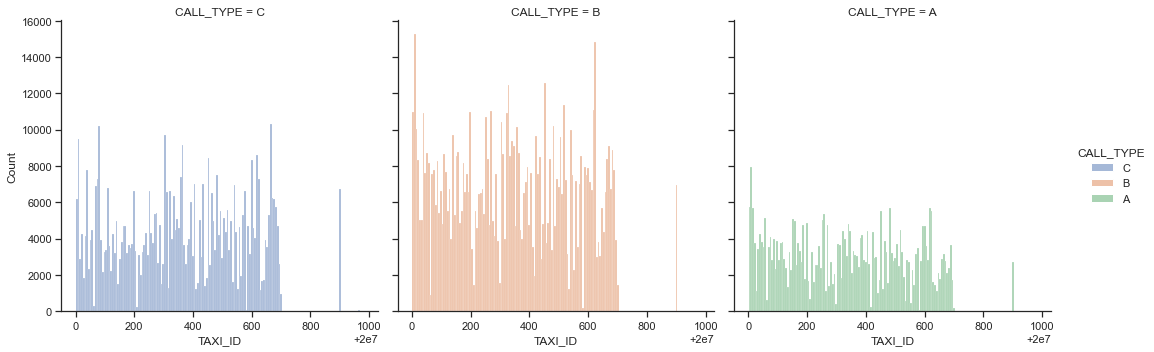

In [33]:
## CALL TYPE VISUALIZATION

sns.displot(data=train, x="TAXI_ID", hue="CALL_TYPE", col="CALL_TYPE")

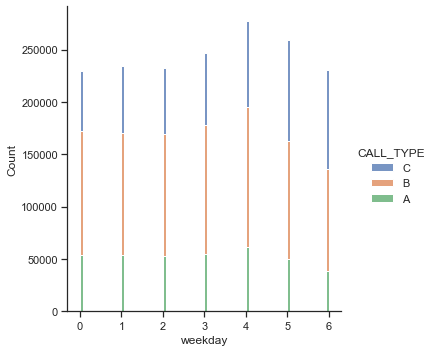

In [30]:
sns.displot(train, x="weekday", hue="CALL_TYPE", element="step",multiple="stack")

### Note:
- **From the above plot we could see that Call Type B & C combined together proves that in majority of cases taxis were direcrlty called by the customer**


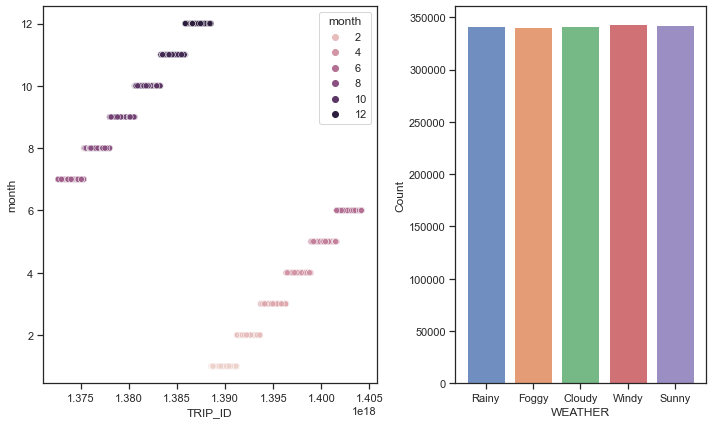

In [32]:
## MONTH, TRIP_ID & WEATHER STUDY
f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=train, x="TRIP_ID", y="month", hue="month", ax=axs[0])
sns.histplot(data=train, x="WEATHER", hue="WEATHER", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Note:
- **From the above plot we could see the weather data remains relatively on the same scale thereby adding not a great level of granularity to our study**


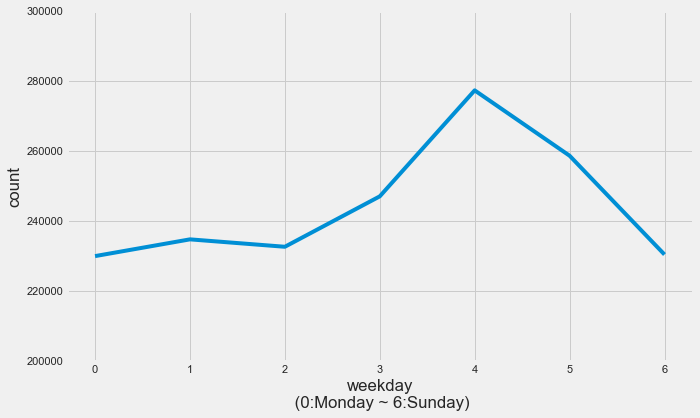

In [48]:
# weekday, groupby whole data
weekday = pd.DataFrame(data=train.groupby("weekday").TRIP_ID.count()).reset_index()

with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(10,6))
    
    plt.plot(weekday["weekday"], weekday["TRIP_ID"])
    plt.xlabel("weekday\n (0:Monday ~ 6:Sunday)")
    plt.ylabel("count")
    plt.ylim([200000, 300000])

### Note:
- **From the above grouped weekly time plot we could see that the peak demand for the drivers is on Firday followed by a steap downward trend as we approcah the week-end**


/var/folders/5x/9fds1j5d0jd6_jywxbx2scbc0000gn/T/ipykernel_17462/2261876694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',square=True)


<AxesSubplot: >

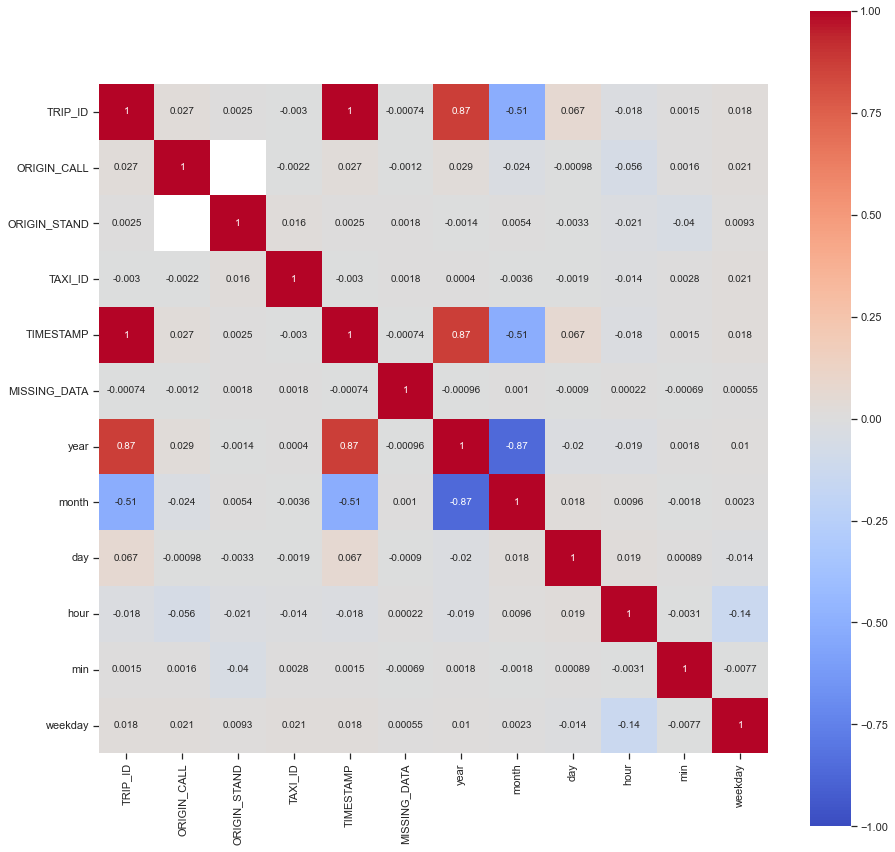

In [40]:
# CORRELATION STUDY 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',square=True)

In [69]:
# Visualization, sampling 5000 datas.
mapping_1st = pd.DataFrame({
    "date":train.head(5000)["data_time"].values,
    "lat":train.head(5000)["lat_1st"].values,
    "lon":train.head(5000)["lon_1st"].values
})

mapping_last = pd.DataFrame({
    "date":train.head(5000)["data_time"].values,
    "lat":train.head(5000)["lat_last"].values,
    "lon":train.head(5000)["lon_last"].values
})

por_map = folium.Map(location=[41.141412,-8.590324], tiles='Stamen Terrain', zoom_start=11)

for i, r in mapping_1st.iterrows():
    folium.CircleMarker(location=[r["lat"],r["lon"]], radius=0.5, color="blue").add_to(por_map)

for i, r in mapping_last.iterrows():
    folium.CircleMarker(location=[r["lat"],r["lon"]], radius=0.5, color="red").add_to(por_map)    
    
por_map

### Note:
- **With a sample of data plotted on the above map we could clearly see that some of the trips were outside the city of Porto**

In [67]:
# CUSTOMER CALL TYPE STUDY
s=0
for l in test.TAXI_ID.unique():
    if l not in train.TAXI_ID.unique():
        s = s+1
p=0
g = []
for l in test.ORIGIN_CALL.unique():
    if l not in train.ORIGIN_CALL.unique():
        p = p+1
        g.append(l)
s,p

(0, 20)

### Note:
- **The above that all the taxi ids in test set are also present in training set. We don't have any new taxi id in test data. But there are 20 origin calls that are not in training data but are in test data.**
g

In [68]:
g[1:]

[85698.0,
 85224.0,
 86098.0,
 86436.0,
 74478.0,
 81753.0,
 67507.0,
 65127.0,
 66996.0,
 72185.0,
 75460.0,
 73870.0,
 72911.0,
 73071.0,
 75037.0,
 80148.0,
 66812.0,
 70885.0,
 76232.0]

### Note:
- **g as saved above has list of origin_calls that are in test but not in train**

<a id="4"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 4. MODELING</p>


**The goal of this study is to anticipate the destination's longitude and latitude. Because of the underlying Markovianity of the trajectory, I used the deep learning architecture of Echo state Networks. This is comparable to our prediction study, in which we assume that flights with similar suffixes would lead to similar or close destinations. Furthermore, this architecture comprises a single bias unit and direct input-to-readout connections.**


- An echo state network (ESN) is a reservoir computer that employs a recurrent neural network with a sparsely connected hidden layer (usually with less than 1% connection). Hidden neurons' connections and weights are fixed and allocated at random. The weights of output neurons can be taught to create or replicate specified temporal patterns by the network. The fundamental attraction of this network is that, despite its nonlinear behavior, the only weights that change during training are those for the synapses that connect the hidden neurons to the output neurons. As a result, the error function is quadratic in relation to the parameter vector and can be readily differentiated to a linear system.

<a id="5"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 5. EVALUATION</p>



The evaluation metric for our model will be Mean Haversine Distance. The Haversine Distance is commonly used in navigation, it measures distances between two points on a sphere based on their latitude and longitude. Between two locations it can be computed, Where ϕ is the latitude, λ is the longitude, d is the distance between two points, and r is the sphere's radius, in our case, it should be replaced by the Earth's radius in the desired metric (e.g., 6371 km).


The best parameters found by the grid search are:
Nr =250,  sigma = 0.4, lambda = 0.01 Leak =1 Connectivity = 30%


The top model gives a
- validation error of km 1.01646 (MHD), and a
- train error of km 0.8011 (MHD).

It is trained with the first 2,500 trips and tested over the 5,000 following ones.We can also see how the network predicts the destination as the taxi ride goes on, the green points are the predicted destination as we go through the real trajectory (redpoints). The X stands for the predicted final destination of which we evaluate the MHD.


### Note:
- **Technical brief will be done during live presentation**

<a id="6"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 6. THANK YOU 😊  </p>
